In [43]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches
import matplotlib as m
from PIL import Image
m.style.use('ggplot')

In [3]:
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [5]:
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis = 1, inplace = True)
df_can.rename (columns = {'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace = True)
df_can.columns = list(map(str, df_can.columns))
df_can.set_index('Country', inplace = True)
df_can['Total'] =  df_can.sum (axis = 1)
years = list(map(str, range(1980, 2014)))
print ('data dimensions:', df_can.shape)

data dimensions: (195, 38)


In [6]:
df_dsn = df_can.loc[['Denmark', 'Norway', 'Sweden'], :]

In [10]:
total_values = sum(df_dsn['Total'])
category_prop = [(float(value) / total_values) for value in df_dsn['Total']]
for i,prop in enumerate(category_prop):
  print(df_dsn.index.values[i] + " : " + str(prop))

Denmark : 0.32255663965602777
Norway : 0.1924094592359848
Sweden : 0.48503390110798744


In [11]:
width = 40
height = 10
total_num_tiles = width * height 

In [12]:
tiles_per_category = [round(p * total_num_tiles) for p in category_prop]
for i,tiles in enumerate(tiles_per_category):
  print(df_dsn.index.values[i] + ": " + str(tiles))

Denmark: 129
Norway: 77
Sweden: 194


In [18]:
waffle_chart = np.zeros((height, width))
category_index = 0
tile_index = 0

for col in range(width):
    for row in range(height):
        tile_index += 1
        if tile_index > sum(tiles_per_category[0:category_index]):
    
            category_index += 1       
        waffle_chart[row, col] = category_index
        
print ('Waffle chart populated!')

Waffle chart populated!


<Figure size 432x288 with 0 Axes>

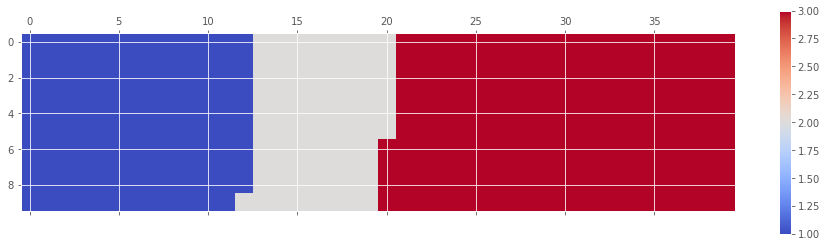

In [22]:
fig = plt.figure()
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart,cmap=colormap)
plt.colorbar()

([], <a list of 0 Text major ticklabel objects>)

<Figure size 432x288 with 0 Axes>

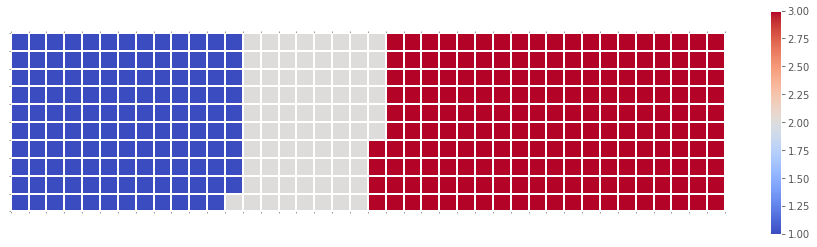

In [25]:
fig = plt.figure()
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart,cmap=colormap)
plt.colorbar()
ax = plt.gca()
ax.set_xticks(np.arange(-.5,(width),1),minor=True)
ax.set_yticks(np.arange(-.5,(height),1),minor=True)
ax.grid(which="minor",color="w",linestyle='-',linewidth=2)
plt.xticks([])
plt.yticks([])

3
12094


<Figure size 432x288 with 0 Axes>

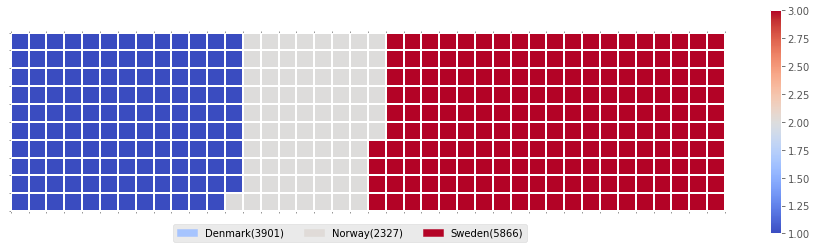

In [30]:
fig = plt.figure()
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart,cmap=colormap)
plt.colorbar()
ax = plt.gca()
ax.set_xticks(np.arange(-.5,(width),1),minor=True)
ax.set_yticks(np.arange(-.5,(height),1),minor=True)
ax.grid(which="minor",color="w",linestyle='-',linewidth=2)
plt.xticks([])
plt.yticks([])
legend_handles = []
values_cumsum = np.cumsum(df_dsn['Total'])
total_values = values_cumsum[len(values_cumsum) - 1]
for i,category in enumerate(df_dsn.index.values):
  label_str = category + '('+ str(df_dsn['Total'][i]) +')'
  color_var = colormap(float(values_cumsum[i])/total_values)
  legend_handles.append(mpatches.Patch(color=color_var,label = label_str))
plt.legend(handles=legend_handles,loc="lower center",ncol=len(df_dsn.index.values),bbox_to_anchor=(0.,-0.2,0.95,.1))

In [34]:
from wordcloud import WordCloud, STOPWORDS

In [36]:
!wget --quiet https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/alice_novel.txt
alice_novel = open('alice_novel.txt', 'r').read()
print ('File downloaded and saved!')

File downloaded and saved!


In [37]:
stopwords = set(STOPWORDS)

In [38]:
alice_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords 
)
alice_wc.generate(alice_novel)

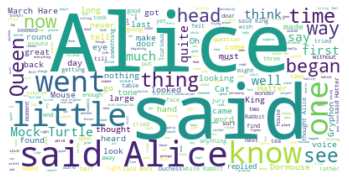

In [39]:
plt.imshow(alice_wc,interpolation='bilinear')
plt.axis('off')
plt.show()

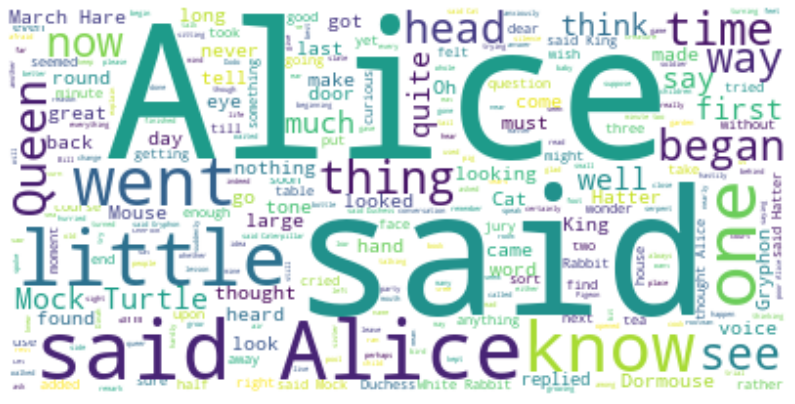

In [40]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)
plt.imshow(alice_wc,interpolation='bilinear')
plt.axis('off')
plt.show()

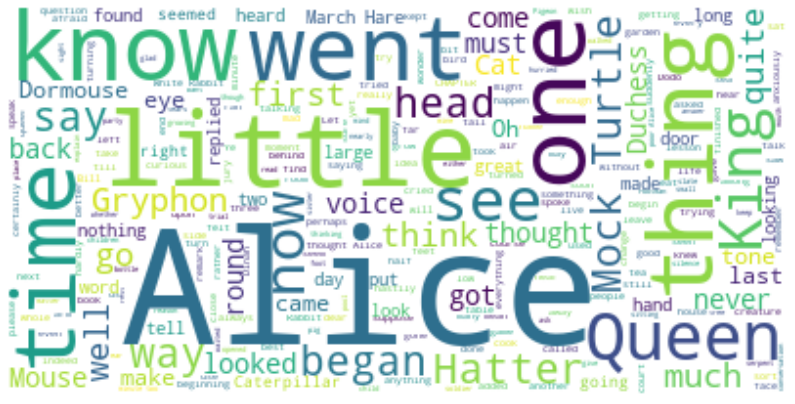

In [41]:
stopwords.add('said')
alice_wc.generate(alice_novel)
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)
plt.imshow(alice_wc,interpolation='bilinear')
plt.axis('off')
plt.show()

In [44]:
!wget --quiet https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Images/alice_mask.png
alice_mask = np.array(Image.open('alice_mask.png'))    
print('Image downloaded and saved!')

Image downloaded and saved!


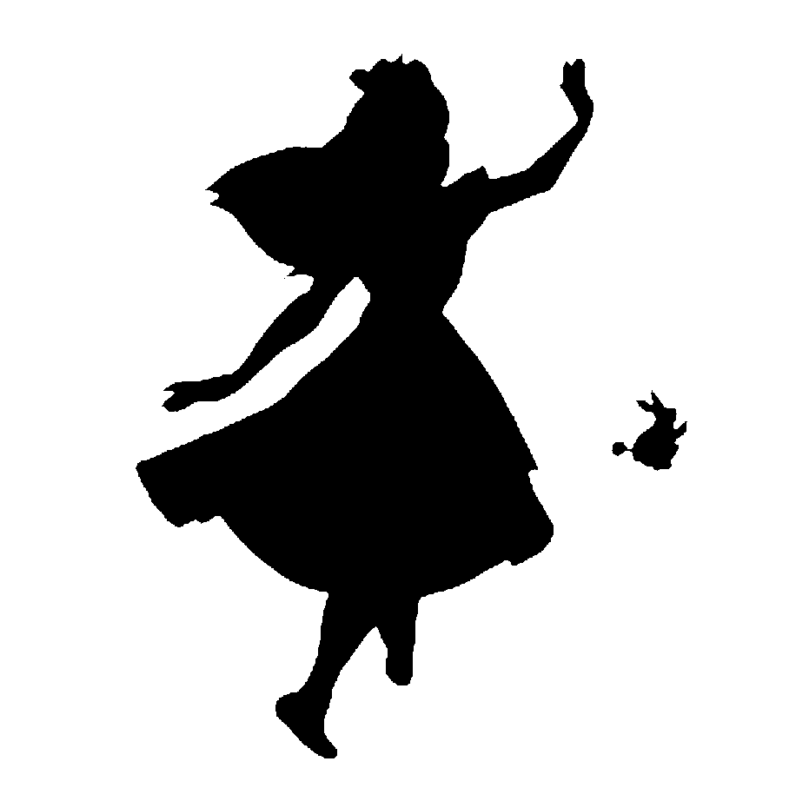

In [45]:
fig = plt.figure()
fig.set_figwidth(14) 
fig.set_figheight(18) 

plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

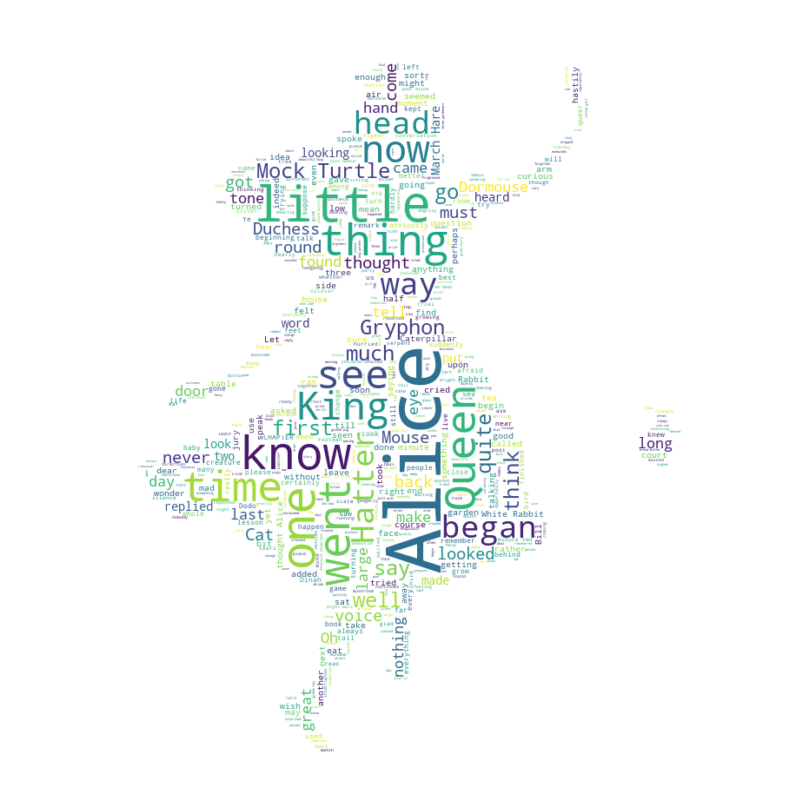

In [46]:
alice_wc = WordCloud(background_color="white",max_words=2000,mask=alice_mask,stopwords=stopwords)
alice_wc.generate(alice_novel)
fig = plt.figure()
fig.set_figwidth(14) 
fig.set_figheight(18) 

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [49]:
import seaborn as sns


In [47]:
df_tot = pd.DataFrame(df_can[years].sum(axis=0))
df_tot.index = map(float, df_tot.index)
df_tot.reset_index(inplace=True)
df_tot.columns = ['year', 'total']
df_tot.head()

,year,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


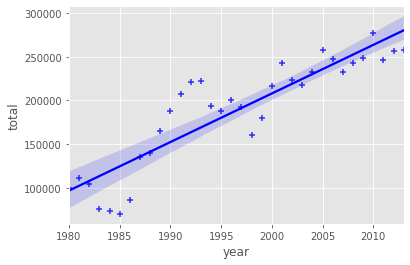

In [53]:
ax = sns.regplot(x='year',y='total',data=df_tot,color="blue",marker="+")

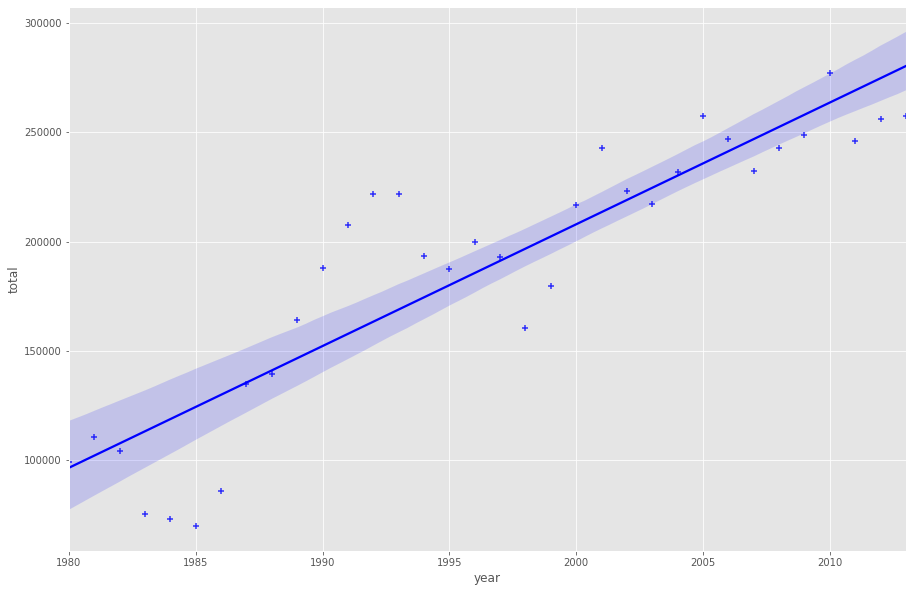

In [54]:
plt.figure(figsize=(15,10))
ax = sns.regplot(x='year',y='total',data=df_tot,color="blue",marker="+")

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

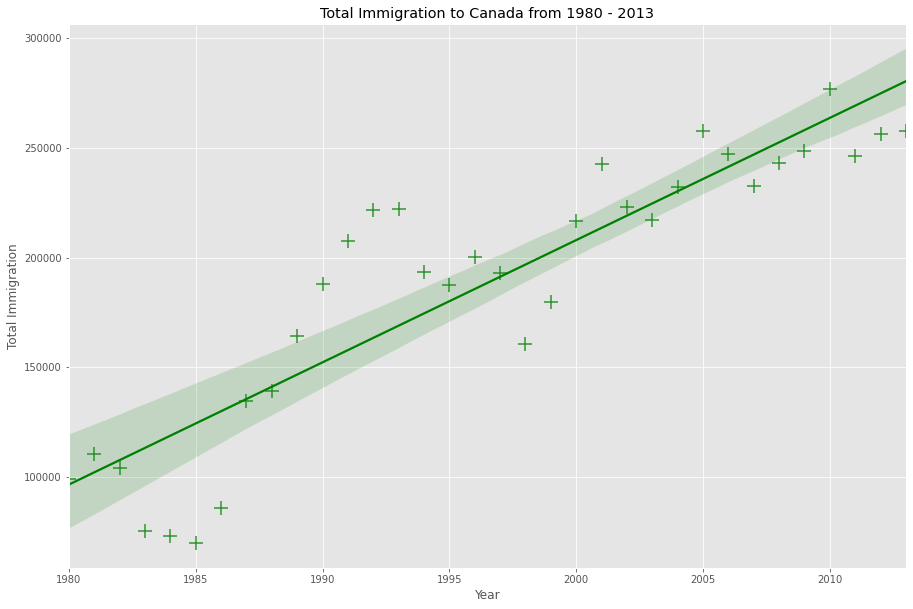

In [56]:
plt.figure(figsize=(15,10))
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration') # add x- and y-labels
ax.set_title('Total Immigration to Canada from 1980 - 2013')

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

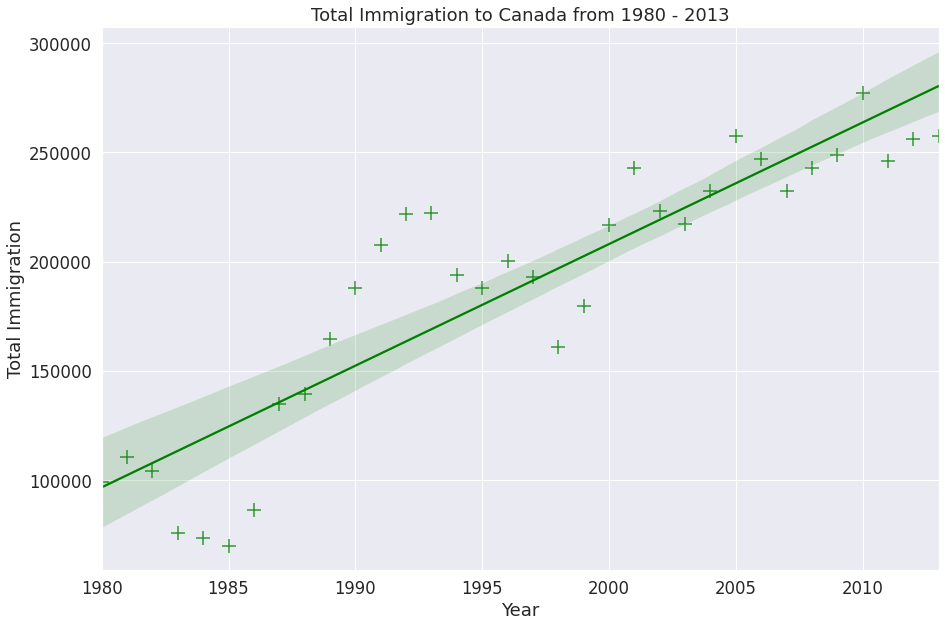

In [57]:
plt.figure(figsize=(15,10))
sns.set(font_scale=1.5)
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration') 
ax.set_title('Total Immigration to Canada from 1980 - 2013')

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

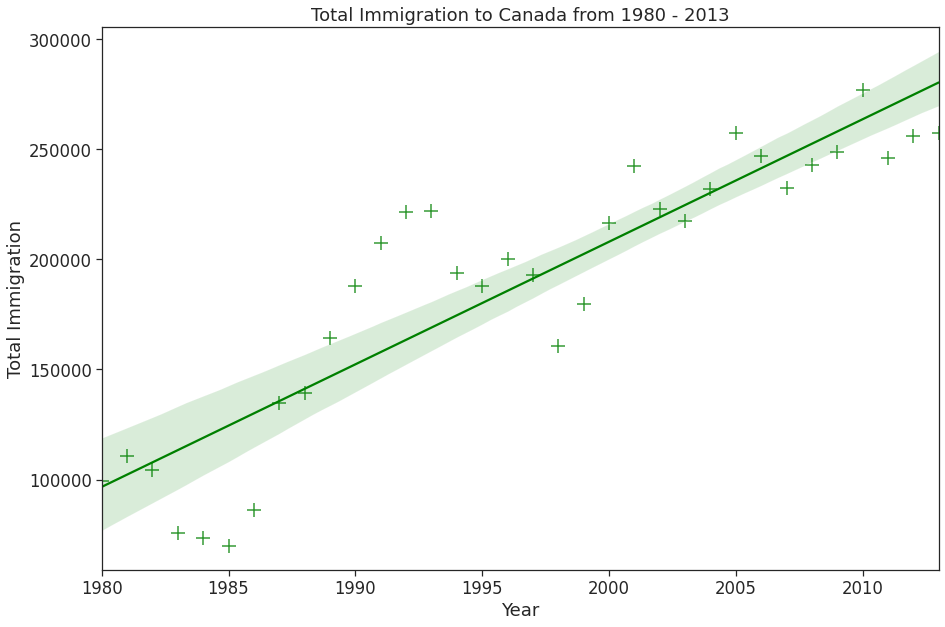

In [58]:
plt.figure(figsize=(15,10))
sns.set(font_scale=1.5)
sns.set_style('ticks')
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration') # add x- and y-labels
ax.set_title('Total Immigration to Canada from 1980 - 2013')

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

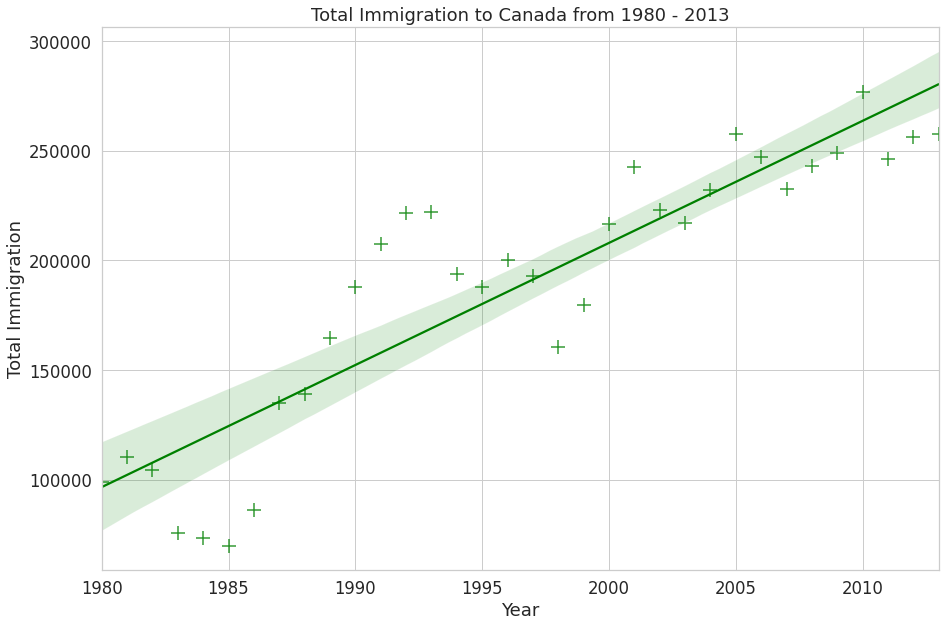

In [59]:
plt.figure(figsize=(15,10))
sns.set(font_scale=1.5)
sns.set_style('whitegrid')
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration') # add x- and y-labels
ax.set_title('Total Immigration to Canada from 1980 - 2013')